<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento de dados desbalanceados 

- Undersampling : Diminui uma quantidade da amostra que contem os dados marjoritários;

## Algoritmos importantes
1. ### _Tomek Links_
2. ### _SMOTE_

In [ ]:
import pandas as pd
census = pd.read_csv("/content/census.csv")

In [ ]:
census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
import numpy as np

np.unique(census['income'], return_counts= True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

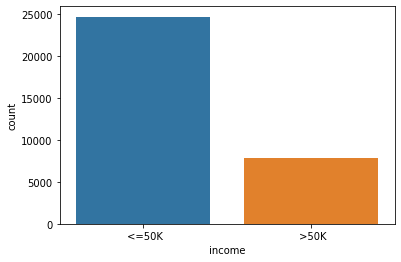

In [ ]:
import seaborn as sns

sns.countplot(x = census['income']);

In [ ]:
X_census = census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
X_census[0][1]

' State-gov'

In [ ]:
y_census = census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()



X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
# convertendo os atributos categóricos para numéricos por meio do LabelEncoder
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

#### Subamostragem com Tomek Link

In [ ]:
from imblearn.under_sampling import TomekLinks

# escolhendo a classe majoritária
tl = TomekLinks(sampling_strategy='majority')

X_under, y_under = tl.fit_resample(X_census, y_census)
X_under.shape, y_under.shape

((30160, 14), (30160,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X_census = onehotencorder.fit_transform(X_under).toarray()
X_census

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((25636, 14), (4524, 14))

In [ ]:
# 84.70% com os dados originais
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8580901856763926

In [ ]:
print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3340
        >50K       0.76      0.66      0.71      1184

    accuracy                           0.86      4524
   macro avg       0.82      0.80      0.81      4524
weighted avg       0.85      0.86      0.85      4524



### Subamostragem com SMOTE

In [ ]:
census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()



X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
y_census = census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census) #Atualizado 20/05/2022

In [ ]:
X_over.shape, y_over.shape

((49440, 14), (49440,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X_census = onehotencorder.fit_transform(X_over).toarray()
X_census

array([[   0.        ,    0.        ,    0.        , ..., 2174.        ,
           0.        ,   40.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   13.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   48.96356945],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ]])

In [ ]:
X_over.shape

(49440, 14)

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.9099244875943905

In [ ]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416



# Seleção de Atributos

In [ ]:
import pandas as pd

census = pd.read_csv("/content/census.csv")

In [ ]:
colunas = census.columns[:-1]
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [ ]:
X_census = census.iloc[:, 0:14].values
y_census = census.iloc[:, 14].values

In [ ]:
X_census, y_census

(array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
        [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
        [38, ' Private', 215646, ..., 0, 40, ' United-States'],
        ...,
        [58, ' Private', 151910, ..., 0, 40, ' United-States'],
        [22, ' Private', 201490, ..., 0, 20, ' United-States'],
        [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
       dtype=object),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
# Padronização 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_census_scaler = scaler.fit_transform(X_census)
X_census_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

### Low Variance
- Quais desses 14 atributos da base de dados são os mais importantes.

In [ ]:
X_census.shape[1]

14

In [ ]:
import numpy as np
np.sqrt(X_census[:,0].var()), X_census_scaler[:,0].var()

(13.640223092304081, 0.034913808595952486)

In [ ]:
# estamos pegando a variância de cada uma desses 14 atributos.
for i in range(X_census.shape[1]):
  #print(i)
  print(X_census_scaler[:,i].var())

0.034913808595952486
0.03312115190663569
0.005138537590667898
0.06657103564450892
0.029416385024073417
0.06301761677301636
0.09123816653931152
0.10326534394406342
0.04502805169292987
0.22136950173699113
0.00545419549240862
0.008557270623428908
0.015874043397822807
0.03641266114220053


In [ ]:
# salário - renda = parecidos
# idade - gênero = diferentes
from sklearn.feature_selection import VarianceThreshold

selecao = VarianceThreshold(threshold=0.05)
X_census_variancia = selecao.fit_transform(X_census_scaler)
X_census_variancia.shape

(32561, 5)

In [ ]:
X_census_variancia, selecao.variances_

(array([[0.6       , 0.66666667, 0.07142857, 0.2       , 1.        ],
        [0.6       , 0.33333333, 0.28571429, 0.        , 1.        ],
        [0.73333333, 0.        , 0.42857143, 0.2       , 1.        ],
        ...,
        [0.73333333, 1.        , 0.07142857, 0.8       , 0.        ],
        [0.73333333, 0.66666667, 0.07142857, 0.6       , 1.        ],
        [0.73333333, 0.33333333, 0.28571429, 1.        , 0.        ]]),
 array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
        0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
        0.0054542 , 0.00855727, 0.01587404, 0.03641266]))

In [ ]:
indices = np.where(selecao.variances_ > 0.05)
indices

(array([3, 5, 6, 7, 9]),)

In [ ]:
colunas[indices]

Index(['education', 'marital-status', 'occupation', 'relationship', 'sex'], dtype='object')

In [ ]:
base_census_variancia = census.drop(columns = ['age', 'workclass', 'final-weight',
                                                    'education-num', 'race', 'capital-gain',
                                                    'capital-loos', 'hour-per-week', 
                                                    'native-country'], axis = 1)
base_census_variancia

,education,marital-status,occupation,relationship,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,<=50K
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,<=50K
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,<=50K
...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,<=50K
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,>50K
32558,HS-grad,Widowed,Adm-clerical,Unmarried,Female,<=50K
32559,HS-grad,Never-married,Adm-clerical,Own-child,Male,<=50K


In [ ]:
X_census_var = base_census_variancia.iloc[:, 0:5].values
y_census_var = base_census_variancia.iloc[:,5].values

In [ ]:
X_census_var

array([[' Bachelors', ' Never-married', ' Adm-clerical',
        ' Not-in-family', ' Male'],
       [' Bachelors', ' Married-civ-spouse', ' Exec-managerial',
        ' Husband', ' Male'],
       [' HS-grad', ' Divorced', ' Handlers-cleaners', ' Not-in-family',
        ' Male'],
       ...,
       [' HS-grad', ' Widowed', ' Adm-clerical', ' Unmarried', ' Female'],
       [' HS-grad', ' Never-married', ' Adm-clerical', ' Own-child',
        ' Male'],
       [' HS-grad', ' Married-civ-spouse', ' Exec-managerial', ' Wife',
        ' Female']], dtype=object)

In [ ]:
y_census_var

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
X_census_variancia[:,0] = label_encoder_education.fit_transform(X_census_variancia[:,0])
X_census_variancia[:,1] = label_encoder_marital.fit_transform(X_census_variancia[:,1])
X_census_variancia[:,2] = label_encoder_occupation.fit_transform(X_census_variancia[:,2])
X_census_variancia[:,3] = label_encoder_relationship.fit_transform(X_census_variancia[:,3])
X_census_variancia[:,4] = label_encoder_sex.fit_transform(X_census_variancia[:,4])

In [ ]:
X_census_variancia

array([[ 9.,  4.,  1.,  1.,  1.],
       [ 9.,  2.,  4.,  0.,  1.],
       [11.,  0.,  6.,  1.,  1.],
       ...,
       [11.,  6.,  1.,  4.,  0.],
       [11.,  4.,  1.,  3.,  1.],
       [11.,  2.,  4.,  5.,  0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3,4])],remainder='passthrough')
X_census_var = onehotencorder.fit_transform(X_census_var).toarray()
X_census_var

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
scaler = MinMaxScaler()
X_census_variancia = scaler.fit_transform(X_census_var)
X_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_var, X_census_teste_var, y_census_treinamento_var, y_census_teste_var = train_test_split(X_census_var, y_census_var, test_size=0.15, random_state=0)
X_census_treinamento_var.shape, X_census_teste_var.shape

((27676, 46), (4885, 46))

In [ ]:
# 84.70
from sklearn.ensemble import RandomForestClassifier
random_forest_var = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_var.fit(X_census_treinamento_var, y_census_treinamento_var)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_var.predict(X_census_teste_var)
accuracy_score(y_census_teste_var, previsoes)

0.8176049129989764

### Extra Tree

[Extra Tree](https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X_census_scaler.shape

(32561, 14)

In [ ]:
selecao = ExtraTreesClassifier()
selecao.fit(X_census_scaler, y_census)

ExtraTreesClassifier()

In [ ]:
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [ ]:
importancias = selecao.feature_importances_
importancias

array([0.15424942, 0.04396148, 0.16453809, 0.03356504, 0.09265006,
       0.08006005, 0.07545815, 0.08370356, 0.01456996, 0.02997058,
       0.08745589, 0.02786681, 0.094171  , 0.01777993])

In [ ]:
importancias.sum()

1.0

In [ ]:
indices = []
for i in range(len(importancias)):
  #print(i)
  if importancias[i] >= 0.029:
    indices.append(i)

indices

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12]

In [ ]:
colunas[indices]

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'hour-per-week'],
      dtype='object')

In [ ]:
X_census_extra = X_census[:, indices]
X_census_extra

array([[39, 7, 77516, ..., 1, 2174, 40],
       [50, 6, 83311, ..., 1, 0, 13],
       [38, 4, 215646, ..., 1, 0, 40],
       ...,
       [58, 4, 151910, ..., 0, 0, 40],
       [22, 4, 201490, ..., 1, 0, 20],
       [52, 5, 287927, ..., 0, 15024, 40]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7])],remainder='passthrough')
X_census_extra = onehotencorder.fit_transform(X_census_extra).toarray()
X_census_extra

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.1740e+03,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.5024e+04,
        4.0000e+01]])

In [ ]:
X_census_extra.shape

(32561, 59)

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_extra, X_census_teste_extra, y_census_treinamento_extra, y_census_teste_extra = train_test_split(X_census_extra, y_census, test_size=0.15, random_state=0)
X_census_treinamento_extra.shape, X_census_teste_extra.shape

((27676, 59), (4885, 59))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_extra = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_extra.fit(X_census_treinamento_extra, y_census_treinamento_extra)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
# 0.8470
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_extra.predict(X_census_teste_extra)
accuracy_score(y_census_teste_extra, previsoes)

0.847697031729785

# Redução de Dimensionalidade

- PCA (_Principal Compnent Analysis_)
  Seleção de características /
  Extração de características
  p <= m , onde m = variáveis independentes

- LDA (_Linear Discriminant Analysis_)
  Encontra os eixos que maximizam a separação entre múltiplas classes


- Kernel PCA (**kernel trick**)
  Aumenta a dimensionalidade dos dados
  Os componentes principais são extraídos dos dados com uma dimensionalidade maior






In [2]:
import pandas as pd
base_census = pd.read_csv('/content/census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [4]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [6]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

X_census

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [8]:
from sklearn.model_selection import train_test_split
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [9]:
X_census_treinamento.shape, X_census_teste.shape

((27676, 14), (4885, 14))

## PCA (Principal component analysis)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_census_treinamento_pca = pca.fit_transform(X_census_treinamento)
X_census_testes_pca = pca.transform(X_census_teste)

X_census_treinamento_pca.shape, X_census_testes_pca.shape

((7250, 8), (1280, 8))

In [10]:
X_census_treinamento

array([[ 0.84963698,  0.09120494, -0.95365199, ..., -0.22195594,
        -0.04149311,  0.29795539],
       [-1.35955557,  0.09120494, -0.94364689, ..., -0.22195594,
        -0.69345951,  0.29795539],
       [-0.03404004,  0.09120494, -0.8840954 , ..., -0.22195594,
        -0.04149311,  0.29795539],
       ...,
       [-1.50683507,  1.45968019, -1.4105328 , ..., -0.22195594,
        -0.04149311,  0.29795539],
       [-0.18131954,  0.77544257, -0.24023664, ..., -0.22195594,
         0.77346488,  0.29795539],
       [-0.99135681,  0.09120494, -0.03300423, ..., -0.22195594,
         0.61047328,  0.29795539]])

In [11]:
pca.explained_variance_ratio_

array([0.15008118, 0.10002909, 0.08992815, 0.07920671, 0.07707173,
       0.07576738, 0.06792119, 0.0665399 ])

In [12]:
pca.explained_variance_ratio_.sum()

0.7065453106862346

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_census_pca = RandomForestClassifier(n_estimators=40, random_state=0, criterion = 'entropy')
random_forest_census_pca.fit(X_census_treinamento_pca, y_census_treinamento)

previsoes = random_forest_census_pca.predict(X_census_testes_pca)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [14]:
y_census_teste

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype=object)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.82734375

## Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=8, kernel='rbf')
X_census_treinamento_kpca = kpca.fit_transform(X_census_treinamento)
X_census_teste_kpca = kpca.transform(X_census_teste)

In [ ]:
X_census_treinamento_kpca.shape, X_census_teste_kpca.shape

In [17]:
X_census_treinamento_kpca

array([[-0.31724235,  0.05892179,  0.4304262 , ..., -0.01608488,
         0.04119492, -0.06084232],
       [-0.29092576,  0.52649287,  0.03868984, ..., -0.13579803,
        -0.1562207 ,  0.0016198 ],
       [-0.30386801, -0.1266232 ,  0.27300227, ...,  0.02042805,
         0.03343897, -0.04466982],
       ...,
       [ 0.03871487,  0.34924361, -0.01991315, ..., -0.26623423,
        -0.06453068, -0.22805967],
       [ 0.17765541,  0.21066778, -0.0768917 , ..., -0.19631536,
         0.33568794, -0.24864691],
       [ 0.26018259,  0.42561422, -0.14523454, ...,  0.00616265,
        -0.15335408, -0.01952362]])

In [18]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_kpca = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_kpca.fit(X_census_treinamento_kpca, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [19]:
previsoes = random_forest_census_kpca.predict(X_census_teste_kpca)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [20]:
y_census_teste

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype=object)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.81328125

## LDA (Linear discriminant analysis)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 8)

In [26]:
X_census_treinamento_lda = lda.fit_transform(X_census_treinamento, y_census_treinamento)
X_census_teste_lda = lda.transform(X_census_teste)

ValueError: ignored

In [27]:
X_census_treinamento_lda.shape, X_census_teste_lda.shape

NameError: ignored

In [ ]:
X_census_treinamento_lda

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_lda = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_lda.fit(X_census_treinamento_lda, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_lda.predict(X_census_teste_lda)
previsoes

In [ ]:
y_census_teste

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.81328125

# Detecção de Outliers